# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()



,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
fifa["ValueNumeric"]=[x[1:-1] for x in list(fifa["Value"])]
fifa["ValueNumeric"]=pd.to_numeric(fifa["ValueNumeric"],errors='coerce')

In [5]:
fifa.columns


Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols("ValueNumeric ~ C(Position) * C(fifa['Preferred Foot'])",data=fifa).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Position),8.971195e+06,26.0,4.119870,9.014436e-12
C(fifa['Preferred Foot']),6.410584e+04,1.0,0.765428,3.816470e-01
C(Position):C(fifa['Preferred Foot']),3.108961e+06,26.0,1.427738,7.310256e-02
Residual,1.495218e+09,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

In [7]:
'''
The p value for Position and Preferred Foot is more than 0.05, therefore the interactions 
are not statistically significant and indicates strong evidence for the null hypothesis that that 0<F<1.
However, the p value for Position is less than 0.05, therefore we reject the null hypotheis that 0<F<1 is for Position. Therefore there 
is a relation between Position and Numeric Value and there isn't a relation between preferred foot and numeric value.
'''

"\nThe p value for Position and Preferred Foot is more than 0.05, therefore the interactions \nare not statistically significant and indicates strong evidence for the null hypothesis that that 0<F<1.\nHowever, the p value for Position is less than 0.05, therefore we reject the null hypotheis that 0<F<1 is for Position. Therefore there \nis a relation between Position and Numeric Value and there isn't a relation between preferred foot and numeric value.\n"

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
model = ols("ValueNumeric ~ C(Nationality)",data=fifa).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(Nationality),3.508814e+07,163.0,2.598872,1.584069e-24
Residual,1.473712e+09,17792.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
'''The p value is less than 0.05, therefore we reject the null hypothesis that is 0<F<1, therefore there is a relationship between Numeric Value and Nationality.  '''

'The p value is less than 0.05, therefore we reject the null hypothesis that is 0<F<1, therefore there is a relationship between Numeric Value and Nationality.  '

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
fifa.isna().sum()


Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric      252
dtype: int64

In [11]:
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [31]:
X = fifa[['SprintSpeed','Stamina']]
Y = fifa['ValueNumeric']
X = sm.add_constant(fifa[['SprintSpeed','Stamina']])

In [32]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [33]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.603
Date:                Wed, 08 Jul 2020   Prob (F-statistic):             0.0100
Time:                        18:51:14   Log-Likelihood:            -1.2694e+05
No. Observations:               17907   AIC:                         2.539e+05
Df Residuals:                   17904   BIC:                         2.539e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         282.3958     10.411     27.126      0.000     261.990     302.802
SprintSpeed     0.2967      0.188      1.575      0.115      -0.073       0.666
Stamina        -0.5233      0.174     -3.012      0.003      -0.864      -0.183
==============================================================================
Omnibus:                     2098.070   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2257.068
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       2.412   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [34]:
'''
r squared (0.001) is the coefficient of determination, which is is the proportion of the variance in the 
dependent variable that is predictable from the independent variable. R squared is very low and therefore
indicates that thet
F is 0<F<1, therefore the interactions are not statistically significant and indicate that there isn't
a relation between sprint speed, stamina and value.
'''

"\nr squared (0.001) is the coefficient of determination, which is is the proportion of the variance in the \ndependent variable that is predictable from the independent variable. R squared is very low and therefore\nindicates that thet\nF is 0<F<1, therefore the interactions are not statistically significant and indicate that there isn't\na relation between sprint speed and stamina.\n"

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [35]:
X = fifa['Potential']
Y = fifa['ValueNumeric']
X = sm.add_constant(X)

In [36]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          3.89e-227
Time:                        18:51:41   Log-Likelihood:            -1.2643e+05
No. Observations:               17907   AIC:                         2.529e+05
Df Residuals:                   17905   BIC:                         2.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1067.9234     24.577     43.452      0.000    1019.750    1116.097
Potential    -11.2063      0.343    -32.647      0.000     -11.879     -10.534
==============================================================================
Omnibus:                     2018.581   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2750.605
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       2.781   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [19]:
'''
r squared (0.056) is the coefficient of determination, which is is the proportion of the variance in the 
dependent variable that is predictable from the independent variable. R squared is very low and therefore
indicates that thet
F>1, therefore the interactions are  statistically significant and indicate that there is
a relation between potential and value.
'''

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

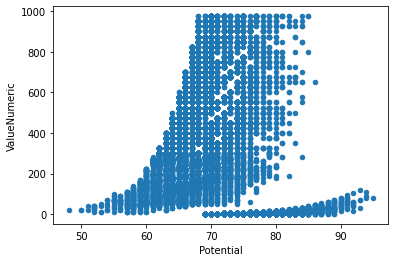

In [38]:
fifa.plot.scatter(x='Potential', y='ValueNumeric')

In [ ]:
#There seems to be some kind of linear relationship, however, correlation doesn't seem too strong